<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***
* **Full Name** = Dominic Choi
* **UCID** = 30109955
***

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [3]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

X, y = load_concrete()


## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [4]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate

# Step 3: Instantiate models
max_depth = 5
dt = DecisionTreeRegressor(max_depth=max_depth)
rf = RandomForestRegressor(max_depth=max_depth)
gb = GradientBoostingRegressor(max_depth=max_depth)

# Step 4: Validate models
models = {'DT': dt, 'RF': rf, 'GB': gb}
results = {}

for name, model in models.items():
    cv_results = cross_validate(model, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    train_score = -1 * cv_results['train_score'].mean()  # Negate to get positive MSE
    test_score = -1 * cv_results['test_score'].mean()    # Negate to get positive MSE
    results[name] = {'Training accuracy': train_score, 'Validation accuracy': test_score}

# Step 5: Print results
results_df = pd.DataFrame(results)
print(results_df)


                             DT          RF         GB
Training accuracy     47.918561   31.537704   3.739270
Validation accuracy  163.201424  159.685766  98.708436


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [5]:
# TO DO: ADD YOUR CODE HERE
# This would be similar to the main step, the main difference is the scoring.

max_depth = 5
dt = DecisionTreeRegressor(max_depth=max_depth)
rf = RandomForestRegressor(max_depth=max_depth)
gb = GradientBoostingRegressor(max_depth=max_depth)

models = {'DT': dt, 'RF': rf, 'GB': gb}
results = {}

for name, model in models.items():
    cv_results = cross_validate(model, X, y, scoring='r2', cv=5, return_train_score=True)
    train_score = cv_results['train_score'].mean()
    test_score = cv_results['test_score'].mean()
    results[name] = {'Training accuracy': train_score, 'Validation accuracy': test_score}

results_df = pd.DataFrame(results).transpose()
print(results_df)


    Training accuracy  Validation accuracy
DT           0.822887             0.173228
RF           0.880989             0.166046
GB           0.986436             0.486759


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

<font color='Green'><b>YOUR ANSWERS HERE</b></font>
1. Compared to Assignment 2, the MSE and R^2 score for training was much better, Gradient Boosting at 3 and 0.98 respectively. The other models in this assignment also preformed better in training, with DT at 47 MSE and 0.82 R^2, and RF at 31 MSE and 0.88 R^2. The Accuracy during validation, was not as good as the previous assignment. 
<br/>
**Rankings for MSE Validation Score:**
GB: 94 > Linear: 95 > RF: 160 > DT: 163
<br/>
**Rankings for R^2 Validation Score:**
Linear: 0.61 > GB: 0.50 > DT: 0.18 > RF: 0.15

2. For this dataset, I would choose either Linear or Gradient Boosting, becuase they had the best overall validation scores. Since both metrics (MSE and R^2) are about the same importance, and one is better for MSE, while the other is better for R^2, it is difficult to make a case why one would be better than the other.

3. Adjusting max_depth, min_samples_split, min_samples_leaf, and max_features parameters can prevent over/under-fitting, thus improving model accuracy

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>
1. Where did you source your code?
    - Lecture Slides on Non-Linear Models
    - Github Copilot

2. In what order did you complete the steps?
    - I followed the order provided in this notebook.

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
    - GitHub Copilot uses the code already written to try and predict what is coming next. This is not always exactly what I need, so I have to modify it. This is because Copilot is useful for tasks that are very common; It is better to use its suggestions as a template. Human intervention is necessary for more specialized tasks.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
    - Reading the numbers from the previous assignment was difficult. To fix this, I compiled the numbers into a .txt file to compare easier.

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [6]:
# TO DO: Import wine dataset
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_headers = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                  'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                  'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_data = pd.read_csv(url, header=None, names=column_headers)

# Split the dataset into feature matrix X and target vector y
X = wine_data.drop(columns=['Class']) # Feature matrix
y = wine_data['Class'] # Target vector

# Print the size and type of X and y
print("Size and type of X:")
print(X.shape, type(X))
print("\nSize and type of y:")
print(y.shape, type(y))

Size and type of X:
(178, 13) <class 'pandas.core.frame.DataFrame'>

Size and type of y:
(178,) <class 'pandas.core.series.Series'>


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [7]:
# TO DO: ADD YOUR CODE HERE
print(wine_data.head())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [8]:
# TO DO: ADD YOUR CODE HERE
# Check for missing values
missing_values = wine_data.isnull().sum()
print("Missing values:")
print(missing_values)

# If there are missing values, fill them in with an appropriate method
if missing_values.any():
    wine_data.fillna(method='ffill', inplace=True)  # Using forward fill method to fill missing values
    print("\nMissing values filled in using forward fill method.")
else:
    print("\nNo missing values found.")

Missing values:
Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

No missing values found.


How many samples do we have of each type of wine?

In [9]:
# TO DO: ADD YOUR CODE HERE
wine_counts = y.value_counts().sort_index()
print("Number of samples for each type of wine:")
print(wine_counts)

Number of samples for each type of wine:
1    59
2    71
3    48
Name: Class, dtype: int64


## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [10]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Step 3: Instantiate models
svc = SVC()
dt = DecisionTreeClassifier(max_depth=3)

models = {'SVC': svc, 'DT': dt}

# Step 4: Validate models
results = {}

for name, model in models.items():
    cv_results = cross_validate(model, X, y, scoring='accuracy', cv=5, return_train_score=True)
    train_score = cv_results['train_score'].mean()
    test_score = cv_results['test_score'].mean()
    results[name] = {'Training accuracy': train_score, 'Validation accuracy': test_score}

# Step 5: Print results
results_df = pd.DataFrame(results).transpose()
print(results_df)


     Training accuracy  Validation accuracy
SVC           0.703743             0.663492
DT            0.974756             0.882063


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [11]:
# TO DO: Implement best model
# The best model is the Decision Tree Classifier
# Train the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Encode the target vector
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train the model
dt.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = dt.predict(X_test)


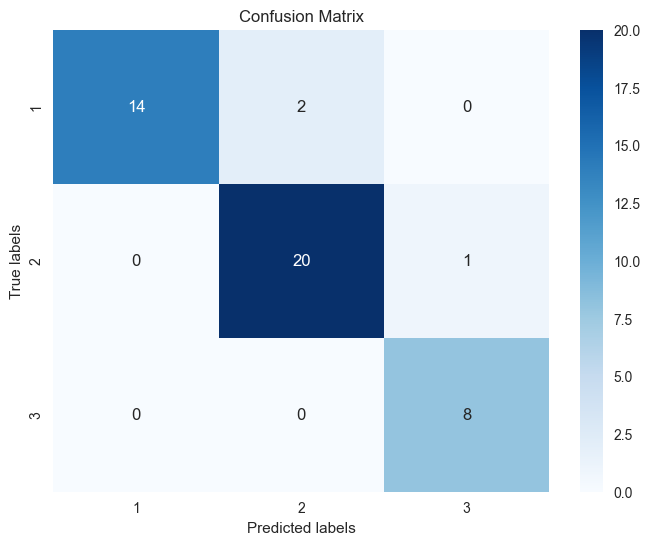

In [12]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

# Get the class names as strings
names = []
for c in le.classes_:
    names.append(str(c))

# Generate the report
report = classification_report(y_test, y_pred, target_names=names)

# Print the report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?

<font color='Green'><b>YOUR ANSWERS HERE</b></font>

1. Support Vector had lower accuracy overall, when compared to Decision Tree. For SVC, the Training accuracy was 0.703743, and Validation accuracy was 0.663492. For DT, Training was 0.974756, and Valdation was 0.882063.
2. Data may be complex, or hyperparameters were not tweaked correctly, or bias in the data could have drawn a bad class divider
3. There were 3 samples were incorrectly classified
4. Recall is more important in this case, because the cost of getting something wrong is not very high, and we also want to capture as many instances as possible. 

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

1. Where did you source your code?
    - Lecture Slides on Non-Linear Models
    - Github Copilot
    - ChatGPT

2. In what order did you complete the steps?
    - I followed the order provided in this notebook.

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
    - GitHub Copilot uses the code already written to try and predict what is coming next. This is not always exactly what I need, so I have to modify it. This is because Copilot is useful for tasks that are very common; It is better to use its suggestions as a template. Human intervention is necessary for more specialized tasks. ChatGPT was also used to ask specific dataframe methods (promt: How do I flip the rows and columns in a dataframe?)

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
    - A challenge I had was that the dataframe printed the wrong orientation. To fix this, I askled ChatGPT and found the df.transpose() method

# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>ADD YOUR FINDINGS HERE</b></font>

- Decision Trees were an additional 20% more accurate compared to SVC in this dataset
- DT had very high accuracy when training, which may mean that the model was slightly overtrained
- DT had an F1 Score of 0.93
- There were a lot more of Class 2 in the dataset, so it classified as Class 2 incorrectly more than other classes

## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

<font color='Green'><b>ADD YOUR THOUGHTS HERE</b></font>

- I liked making the confusion matricies, because it gave a visual representation of the accuracy of the model
- It was interesting learning about how to implement new non-linear learning models
- It was challenging to find motivation to work over the reading week

## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

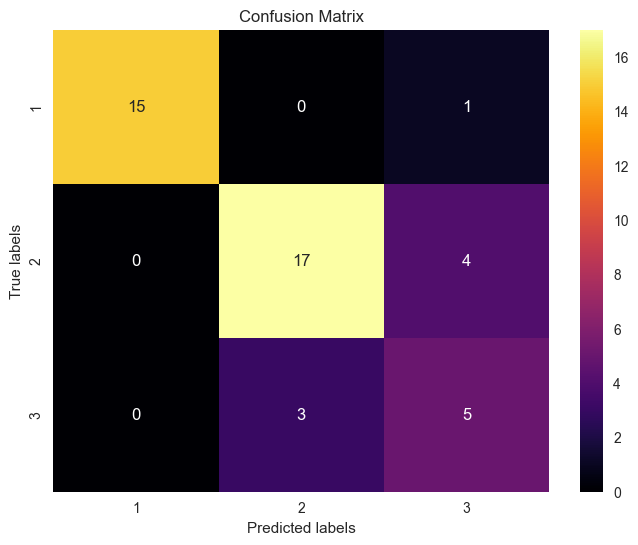

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.85      0.81      0.83        21
           3       0.50      0.62      0.56         8

    accuracy                           0.82        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.84      0.82      0.83        45



In [16]:
# TO DO: ADD YOUR CODE HERE
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Encode the target vector
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train the model
svc.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = svc.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='inferno', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Get the class names as strings
names = []
for c in le.classes_:
    names.append(str(c))

# Generate the report
report = classification_report(y_test, y_pred, target_names=names)

# Print the report
print("Classification Report:")
print(report)


<font color='Green'><b>YOUR ANSWERS HERE</b></font>

1. Linear SVC does not improve results. SVC is suitable for linearly separable data or when a linear decision boundary is appropriate. It finds the "lines" or "slices" that best separates the classes. Decision Trees can handle both linear and non-linear by  partitioning the feature space into regions, allowing for more flexible boundaries.

2. Linear SVC is not as good as Decision Trees, because different wine labels may have features that overlap, causing a misclassification.